<img>
<html>
  <head>
  </head>

  <body>
    <img src="image/12.jpg">
  </body>
</html>

# PJM Hourly Energy Consumption Data

## About the Dataset  
**PJM Interconnection LLC (PJM)** is a **regional transmission organization (RTO)** in the **United States**. It operates as part of the **Eastern Interconnection grid**, managing an **electric transmission system** serving multiple states and regions.  

## Covered Regions  
The dataset includes data from the following states and districts:  

- Delaware  
- Illinois  
- Indiana  
- Kentucky  
- Maryland  
- Michigan  
- New Jersey  
- North Carolina  
- Ohio  
- Pennsylvania  
- Tennessee  
- Virginia  
- West Virginia  
- District of Columbia  

## Data Description  
- The dataset contains **hourly power consumption data** collected from PJM’s official website.  
- All values are measured in **megawatts (MW)**.  
- **Important:** The regions have changed over the years, so **data availability may vary** by date and location.  

---

- **About the author:** Sajjad Ali Shah
- **LinkedIn:** [LinkedIn Profile](https://www.linkedin.com/in/sajjad-ali-shah47/)
- **Dataset link:** [Hourly Energy Consumption](https://www.kaggle.com/datasets/robikscube/hourly-energy-consumption/data)

---

In [2]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the data
pjme=pd.read_csv('./Data/PJME_hourly.csv',index_col=[0],parse_dates=[0])

In [6]:
# Check the data
pjme.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


In [14]:
# shape of the data
print("Shape of the data:", pjme.shape[0],"rows and",pjme.shape[1],"columns")

Shape of the data: 145366 rows and 1 columns


In [15]:
# info of the data
pjme.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145366 entries, 2002-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   PJME_MW  145366 non-null  float64
dtypes: float64(1)
memory usage: 2.2 MB


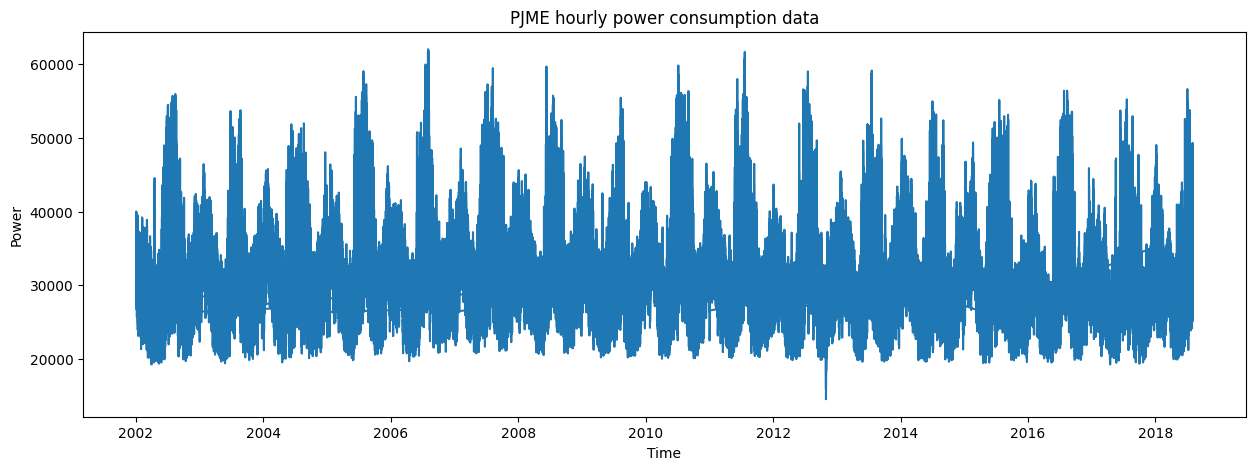

In [7]:
# plot the data
plt.figure(figsize=(15,5))
plt.plot(pjme.index,pjme['PJME_MW'])
plt.title('PJME hourly power consumption data')
plt.ylabel('Power')
plt.xlabel('Time')
plt.grid(False)
plt.show()
